<a href="https://colab.research.google.com/github/calzateu/Optimization_1/blob/main/Project/Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [20]:
!rm -rf Optimization_1/
!git clone https://github.com/calzateu/Optimization_1.git

Cloning into 'Optimization_1'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 32 (delta 8), reused 14 (delta 3), pack-reused 0
Unpacking objects: 100% (32/32), done.


In [21]:
data = pd.read_excel('Optimization_1/Project/Data_Base.xlsx')

In [22]:
data.head(10)

,C_m_delta_e,U_0,rho,st,c,I_y,C_z_delta_e,m,kp,ki,kd
0,-1.3265,49.408818,1.29,0.252505,0.355711,0.17,-3.565,9242.484970,1.51,2.31,0.06
1,-1.3265,62.106212,1.29,0.322645,0.270942,0.17,-3.565,4661.322645,1.05,1.01,0.01
2,-1.3265,9.134269,1.29,0.591182,0.445892,0.17,-3.565,5977.955912,3.51,5.06,1.01
3,-1.3265,30.561122,1.29,0.897796,0.408016,0.17,-3.565,7979.959920,4.66,16.86,1.01
4,-1.3265,60.320641,1.29,0.557114,0.184369,0.17,-3.565,5923.847695,1.05,1.26,0.01
5,-1.3265,99.206413,1.29,0.482966,0.358417,0.17,-3.565,5328.657315,1.01,3.06,0.01
6,-1.3265,75.002004,1.29,0.210421,0.161824,0.17,-3.565,1865.731463,1.51,1.26,0.06
7,-1.3265,71.232465,1.29,0.855711,0.405311,0.17,-3.565,7691.382766,1.06,3.96,0.01
8,-1.3265,11.316633,1.29,0.521042,0.431463,0.17,-3.565,8593.186373,6.21,4.61,1.01
9,-1.3265,38.298597,1.29,0.272545,0.105912,0.17,-3.565,7222.444890,5.56,7.86,1.01


In [23]:
data.shape

(1000, 11)

In [36]:
data1 = data.drop(['ki', 'kd'], axis = 1)
data1

,C_m_delta_e,U_0,rho,st,c,I_y,C_z_delta_e,m,kp
0,-1.3265,49.408818,1.29,0.252505,0.355711,0.17,-3.565,9242.484970,1.51
1,-1.3265,62.106212,1.29,0.322645,0.270942,0.17,-3.565,4661.322645,1.05
2,-1.3265,9.134269,1.29,0.591182,0.445892,0.17,-3.565,5977.955912,3.51
3,-1.3265,30.561122,1.29,0.897796,0.408016,0.17,-3.565,7979.959920,4.66
4,-1.3265,60.320641,1.29,0.557114,0.184369,0.17,-3.565,5923.847695,1.05
...,...,...,...,...,...,...,...,...,...
995,-1.3265,97.024048,1.29,0.653307,0.397194,0.17,-3.565,4733.466934,1.01
996,-1.3265,15.681363,1.29,0.494990,0.432365,0.17,-3.565,7096.192385,4.86
997,-1.3265,45.044088,1.29,0.496994,0.120341,0.17,-3.565,7276.553106,1.20
998,-1.3265,21.236473,1.29,0.677355,0.105912,0.17,-3.565,6356.713427,5.11


In [25]:
oculta1 = tf.keras.layers.Dense(units=8, input_shape=[8])
oculta2 = tf.keras.layers.Dense(units=8)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [71]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.05),
    loss = 'mean_squared_error'
)

In [72]:
target = data1.kp
target = np.asarray(target)
training_data = data1.drop(['kp'], axis=1)
training_data = np.asarray(training_data)
training_data, target

(array([[-1.32650000e+00,  4.94088176e+01,  1.29000000e+00, ...,
          1.70000000e-01, -3.56500000e+00,  9.24248497e+03],
        [-1.32650000e+00,  6.21062124e+01,  1.29000000e+00, ...,
          1.70000000e-01, -3.56500000e+00,  4.66132265e+03],
        [-1.32650000e+00,  9.13426854e+00,  1.29000000e+00, ...,
          1.70000000e-01, -3.56500000e+00,  5.97795591e+03],
        ...,
        [-1.32650000e+00,  4.50440882e+01,  1.29000000e+00, ...,
          1.70000000e-01, -3.56500000e+00,  7.27655311e+03],
        [-1.32650000e+00,  2.12364729e+01,  1.29000000e+00, ...,
          1.70000000e-01, -3.56500000e+00,  6.35671343e+03],
        [-1.32650000e+00,  7.75811623e+01,  1.29000000e+00, ...,
          1.70000000e-01, -3.56500000e+00,  4.84168337e+03]]),
 array([1.510e+00, 1.050e+00, 3.510e+00, 4.660e+00, 1.050e+00, 1.010e+00,
        1.510e+00, 1.060e+00, 6.210e+00, 5.560e+00, 2.500e+00, 1.010e+00,
        1.100e+00, 4.560e+00, 1.050e+00, 1.150e+00, 1.060e+00, 3.010e+00,
       

In [73]:
print('Comenzando entrenamiento')
historical = modelo.fit(training_data, target, epochs=1000, verbose=False)
print('Modelo entrenado!')

Comenzando entrenamiento
Modelo entrenado!


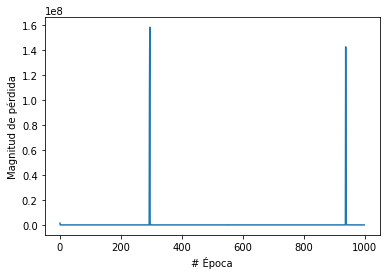

In [74]:
import matplotlib.pyplot as plt
plt.xlabel("# Época")
plt.ylabel("Magnitud de pérdida")
plt.plot(historical.history['loss'])

In [76]:
print('Hagamos predicción!')
resultado = modelo.predict(training_data[0].reshape(1,8))
print(f'El resultado es: {str(resultado)}')
print(f'El valor real es: {target[0]}')

Hagamos predicción!
El resultado es: [[0.55244446]]
El valor real es: 1.51


In [44]:
training_data[0].shape

(8,)

In [51]:
target[0]

1.51